In [1]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt

In [81]:
import matplotlib.cm as cm, matplotlib.font_manager as fm
family = 'Helvetica'
font_title = fm.FontProperties(family=family, style='normal', size=24, weight='normal', stretch='normal')
font_label = fm.FontProperties(family=family, style='normal', size=18, weight='normal', stretch='normal')
font_ticks = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
font_annot = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')

In [82]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

In [83]:
var = 'MEDIUM VARIANT'

In [84]:
df_population = pd.read_excel('population_estimation.xlsx',sheetname= var, skiprows=range(16))

In [85]:
df_population = df_population.rename(columns={'Country code':'country_code','Region, subregion, country or area *':'country_name'})

In [86]:
df_population.head()

,Index,Variant,country_name,Notes,country_code,2015,2016,2017,2018,2019,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,1,Medium variant,WORLD,NaN,900,7383008.820,7466964.280,7550262.101,7632819.325,7714576.923,...,1.106659e+07,1.108247e+07,1.109767e+07,1.111219e+07,1.112603e+07,1.113917e+07,1.115160e+07,1.116329e+07,1.117422e+07,1.118437e+07
1,2,Medium variant,More developed regions,a,901,1253206.546,1256576.162,1259922.493,1263199.677,1266335.192,...,1.285146e+06,1.285199e+06,1.285246e+06,1.285282e+06,1.285303e+06,1.285301e+06,1.285272e+06,1.285209e+06,1.285106e+06,1.284957e+06
2,3,Medium variant,Less developed regions,b,902,6129802.274,6210388.118,6290339.608,6369619.648,6448241.731,...,9.781447e+06,9.797266e+06,9.812422e+06,9.826911e+06,9.840730e+06,9.853871e+06,9.866325e+06,9.878077e+06,9.889112e+06,9.899411e+06
3,4,Medium variant,Least developed countries,c,941,956631.108,979387.925,1002485.957,1025936.734,1049764.676,...,3.024520e+06,3.045449e+06,3.065994e+06,3.086153e+06,3.105922e+06,3.125299e+06,3.144282e+06,3.162871e+06,3.181063e+06,3.198860e+06
4,5,Medium variant,"Less developed regions, excluding least develo...",d,934,5173171.166,5231000.193,5287853.651,5343682.914,5398477.055,...,6.756927e+06,6.751818e+06,6.746428e+06,6.740758e+06,6.734808e+06,6.728572e+06,6.722042e+06,6.715206e+06,6.708049e+06,6.700551e+06


In [87]:
df_country_cd = pd.read_csv('country_codes_pop_est.csv', encoding='utf-8')

In [88]:
df_country_cd['country_code'] = df_country_cd['country_code'].astype(str).str.zfill(3)
df_population['country_code'] = df_population['country_code'].astype(str).str.zfill(3)
df_population.head()

,Index,Variant,country_name,Notes,country_code,2015,2016,2017,2018,2019,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,1,Medium variant,WORLD,NaN,900,7383008.820,7466964.280,7550262.101,7632819.325,7714576.923,...,1.106659e+07,1.108247e+07,1.109767e+07,1.111219e+07,1.112603e+07,1.113917e+07,1.115160e+07,1.116329e+07,1.117422e+07,1.118437e+07
1,2,Medium variant,More developed regions,a,901,1253206.546,1256576.162,1259922.493,1263199.677,1266335.192,...,1.285146e+06,1.285199e+06,1.285246e+06,1.285282e+06,1.285303e+06,1.285301e+06,1.285272e+06,1.285209e+06,1.285106e+06,1.284957e+06
2,3,Medium variant,Less developed regions,b,902,6129802.274,6210388.118,6290339.608,6369619.648,6448241.731,...,9.781447e+06,9.797266e+06,9.812422e+06,9.826911e+06,9.840730e+06,9.853871e+06,9.866325e+06,9.878077e+06,9.889112e+06,9.899411e+06
3,4,Medium variant,Least developed countries,c,941,956631.108,979387.925,1002485.957,1025936.734,1049764.676,...,3.024520e+06,3.045449e+06,3.065994e+06,3.086153e+06,3.105922e+06,3.125299e+06,3.144282e+06,3.162871e+06,3.181063e+06,3.198860e+06
4,5,Medium variant,"Less developed regions, excluding least develo...",d,934,5173171.166,5231000.193,5287853.651,5343682.914,5398477.055,...,6.756927e+06,6.751818e+06,6.746428e+06,6.740758e+06,6.734808e+06,6.728572e+06,6.722042e+06,6.715206e+06,6.708049e+06,6.700551e+06


In [89]:
df_full = df_population[df_population['country_code'].isin(df_country_cd['country_code'])].copy()

In [90]:
col = ['country_name', 'country_code', '2017', '2020', '2030', '2040', '2050', '2060', '2070', '2080', '2090', '2100']
df_final = df_full[col].copy()

In [91]:
df_final['country_name'] = df_final['country_name'].str.replace('United Republic of Tanzania', 'Tanzania')
df_final['country_name'] = df_final['country_name'].str.replace('United States of America', 'USA')
df_final['country_name'] = df_final['country_name'].str.replace('Democratic Republic of the Congo', 'Congo')
df_final['country_name'] = df_final['country_name'].str.replace('Russian Federation', 'Russia')

In [92]:
df_final = df_final.sort_values(by='2017', ascending=True, inplace=False)
df_final = df_final.reset_index(drop=True)
df_final.head()

,country_name,country_code,2017,2020,2030,2040,2050,2060,2070,2080,2090,2100
0,Holy See,336,0.792,0.801,0.797,0.798,0.806,0.809,0.814,0.803,0.804,0.798
1,Tokelau,772,1.300,1.357,1.444,1.502,1.562,1.604,1.612,1.605,1.560,1.496
2,Niue,570,1.618,1.632,1.674,1.738,1.786,1.824,1.835,1.814,1.785,1.743
3,Falkland Islands (Malvinas),238,2.910,2.925,2.925,2.888,2.839,2.777,2.718,2.675,2.620,2.579
4,Saint Helena,654,4.049,4.126,4.303,4.303,4.181,4.085,3.994,3.870,3.695,3.516


In [93]:
f = lambda x: x if isinstance(x, str) else x * 1000
df_final = df_final.applymap(f)

In [94]:
df_continents = df_population[df_population['country_name']==df_population['country_name'].str.upper()]
df_continents = df_continents[col].copy()
df_continents = df_continents.applymap(f)

In [95]:
df_graph = df_continents.copy()
df_graph.index = df_graph['country_name']
df_graph = df_graph.drop(['country_name'], axis=1)
df_graph = df_graph.transpose()
df_graph = df_graph.drop('country_code', axis=0)
df_graph.head()

country_name,WORLD,AFRICA,ASIA,EUROPE,LATIN AMERICA AND THE CARIBBEAN,NORTHERN AMERICA,OCEANIA
2017,7.55026e+09,1.25627e+09,4.50443e+09,7.42074e+08,6.45593e+08,3.61208e+08,4.06908e+07
2020,7.79548e+09,1.35262e+09,4.62345e+09,7.4339e+08,6.64474e+08,3.69159e+08,4.23838e+07
2030,8.5512e+09,1.70354e+09,4.94659e+09,7.39456e+08,7.18483e+08,3.95453e+08,4.76832e+07
2040,9.21034e+09,2.1003e+09,5.15442e+09,7.28823e+08,7.57027e+08,4.17193e+08,5.25723e+07
2050,9.77182e+09,2.52756e+09,5.25693e+09,7.15721e+08,7.79841e+08,4.34655e+08,5.71215e+07


In [96]:
color_list = get_colors('nipy_spectral', n=len(df_continents), start=0.1, stop=0.95, reverse=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


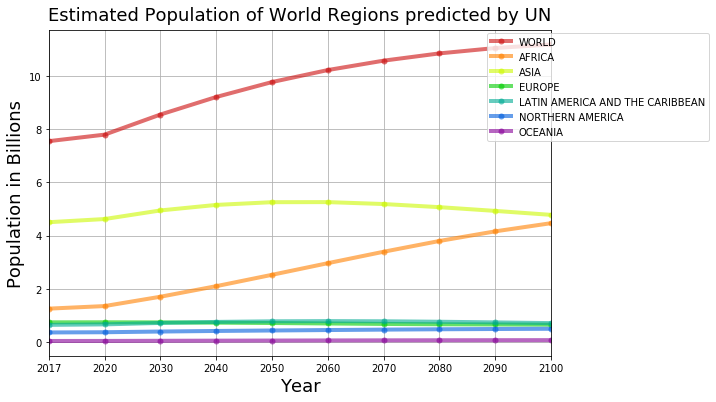

In [97]:
fig, ax = plt.subplots(figsize=[9, 6])
lines = []
for col, c in zip(df_graph.columns, color_list):
    ax.plot(df_graph[col]/10**9, linewidth=4, alpha=0.6, marker='o', markeredgewidth=0, color=c)
    lines.append(col)
    
ax.set_title('Estimated Population of World Regions predicted by UN', fontproperties=label_ft, y=1.01)
ax.set_xlabel('Year', fontproperties=label_ft)
ax.set_ylabel('Population in Billions', fontproperties=label_ft)
ax.grid()
ax.set_facecolor('#ffffff')
ax.set_xlim([2017, 2100])
ax.legend(lines, loc='center right', bbox_to_anchor=(1.325,0.825))
plt.show()

In [102]:
africa = df_full.iloc[0:58]
africa_change = africa['2100'] - africa['2017']
world_change = df_full['2100'] - df_full['2017']

print('African population will grow by {:,.0f} people by 2100'.format(africa_change.sum()))
print('World population will grow by {:,.0f} people by 2100'.format(world_change.sum()))
print('That is {:,.0f} new people outside of Asia'.format(world_change.sum() - africa_change.sum()))
print('Africa accounts for {:,.1f}% of the projected growth'.format(africa_change.sum() * 100 / world_change.sum()))

African population will grow by 3,211,320 people by 2100
World population will grow by 3,634,106 people by 2100
That is 422,785 new people outside of Asia
Africa accounts for 88.4% of the projected growth


In [107]:
most_pop_2017 = df_full.sort_values(by='2017', ascending=False).reset_index().copy()
most_pop_2017.index = most_pop_2017.index.map(lambda x: x + 1)
most_pop_2017['2017'] = most_pop_2017['2017'].map(lambda x: '{:,.0f}'.format(x))
most_pop_2017 = most_pop_2017.rename(columns={'country_name':'Country', '2017':'2017 Population'})
most_pop_2017[['Country', '2017 Population']].head(10)

,Country,2017 Population
1,China,"1,409,517"
2,India,"1,339,180"
3,United States of America,"324,459"
4,Indonesia,"263,991"
5,Brazil,"209,288"
6,Pakistan,"197,016"
7,Nigeria,"190,886"
8,Bangladesh,"164,670"
9,Russian Federation,"143,990"
10,Mexico,"129,163"


In [108]:
most_pop_2100 = df_full.sort_values(by='2100', ascending=False).reset_index().copy()
most_pop_2100.index = most_pop_2100.index.map(lambda x: x + 1)
most_pop_2100['2100'] = most_pop_2100['2100'].map(lambda x: '{:,.0f}'.format(x))
most_pop_2100 = most_pop_2100.rename(columns={'country_name':'Country', '2100':'2100 Population'})
most_pop_2100[['Country', '2100 Population']].head(10)

,Country,2100 Population
1,India,"1,516,597"
2,China,"1,020,665"
3,Nigeria,"793,942"
4,United States of America,"447,483"
5,Democratic Republic of the Congo,"378,975"
6,Pakistan,"351,943"
7,Indonesia,"306,026"
8,United Republic of Tanzania,"303,832"
9,Ethiopia,"249,530"
10,Uganda,"213,758"
